<a href="https://colab.research.google.com/github/Elman295/CIFAR10/blob/main/Multi_layer_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIFAR10 with Multi_NN

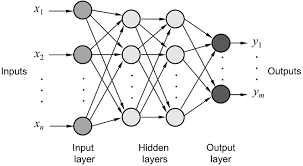

In [17]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python import metrics

In [9]:
data = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = data.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


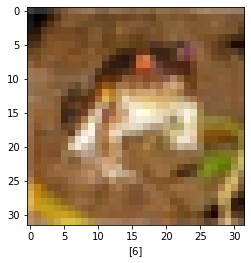

In [10]:
plt.imshow(x_train[0])
plt.xlabel( y_train[0])
plt.show()

Creating the model

In [12]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Flatten(input_shape = (32,32,3)),
    tf.keras.layers.Dense(units = 120, activation = "relu"),
    tf.keras.layers.Dense(units = 120 , activation = "relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units = 10, activation = "softmax")
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 120)               368760    
                                                                 
 dense_3 (Dense)             (None, 120)               14520     
                                                                 
 dropout_1 (Dropout)         (None, 120)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                1210      
                                                                 
Total params: 384,490
Trainable params: 384,490
Non-trainable params: 0
_________________________________________________________________


In [14]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [16]:
y_pred = model(x_train[:1]).numpy()
loss = loss_fn(y_train[:1], y_pred).numpy()
loss

2.345477

Compiling the model

In [18]:

model.compile(
    optimizer = "sgd",
    loss = loss_fn,
    metrics = ["accuracy"]
)

In [19]:
history = model.fit(x_train, y_train, epochs = 15)


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 6s 4ms/step - loss: 1.9488 - accuracy: 0.2982
Epoch 2/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7679 - accuracy: 0.3714
Epoch 3/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6884 - accuracy: 0.4015
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6408 - accuracy: 0.4193
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5999 - accuracy: 0.4326
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5700 - accuracy: 0.4440
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5411 - accuracy: 0.4534
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5175 - accuracy: 0.4604
Epoch 9/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4967 - accuracy: 0.4690
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4786 - accurac

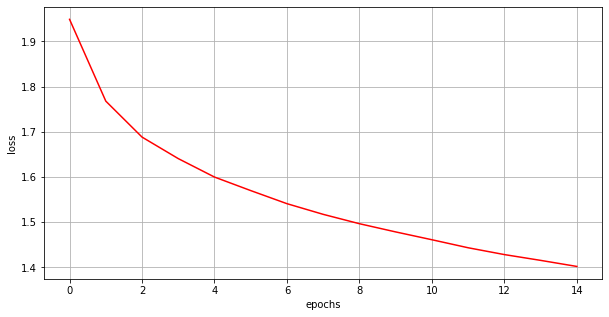

In [22]:
plt.figure(figsize=(10,5))
plt.plot(history.history["loss"], color = "red")
plt.xlabel("epochs")
plt.grid()
plt.ylabel("loss")
plt.show()

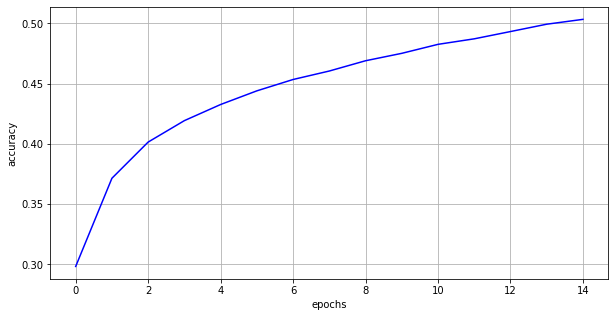

In [23]:
plt.figure(figsize=(10,5))
plt.plot(history.history["accuracy"], color = "blue")
plt.xlabel("epochs")
plt.grid()
plt.ylabel("accuracy")
plt.show()

In [24]:
model.evaluate(x_test, y_test)

 27/313 [=>............................] - ETA: 0s - loss: 1.3847 - accuracy: 0.4942  

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 1.4155 - accuracy: 0.5045


[1.415509819984436, 0.5044999718666077]

In [31]:
prediction = model(x_test)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

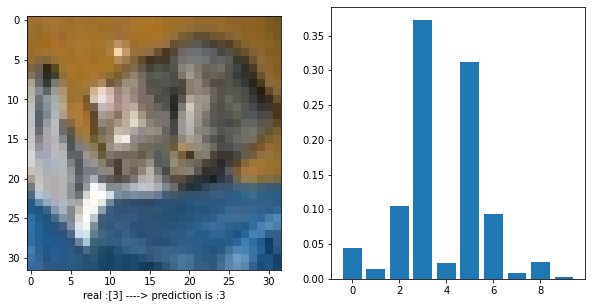

In [36]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(x_test[0])
plt.xlabel(f"real :{y_test[0]} ----> prediction is :{np.argmax(prediction[0])}")
plt.subplot(1,2,2)
plt.bar(range(10),prediction[0])
plt.show()

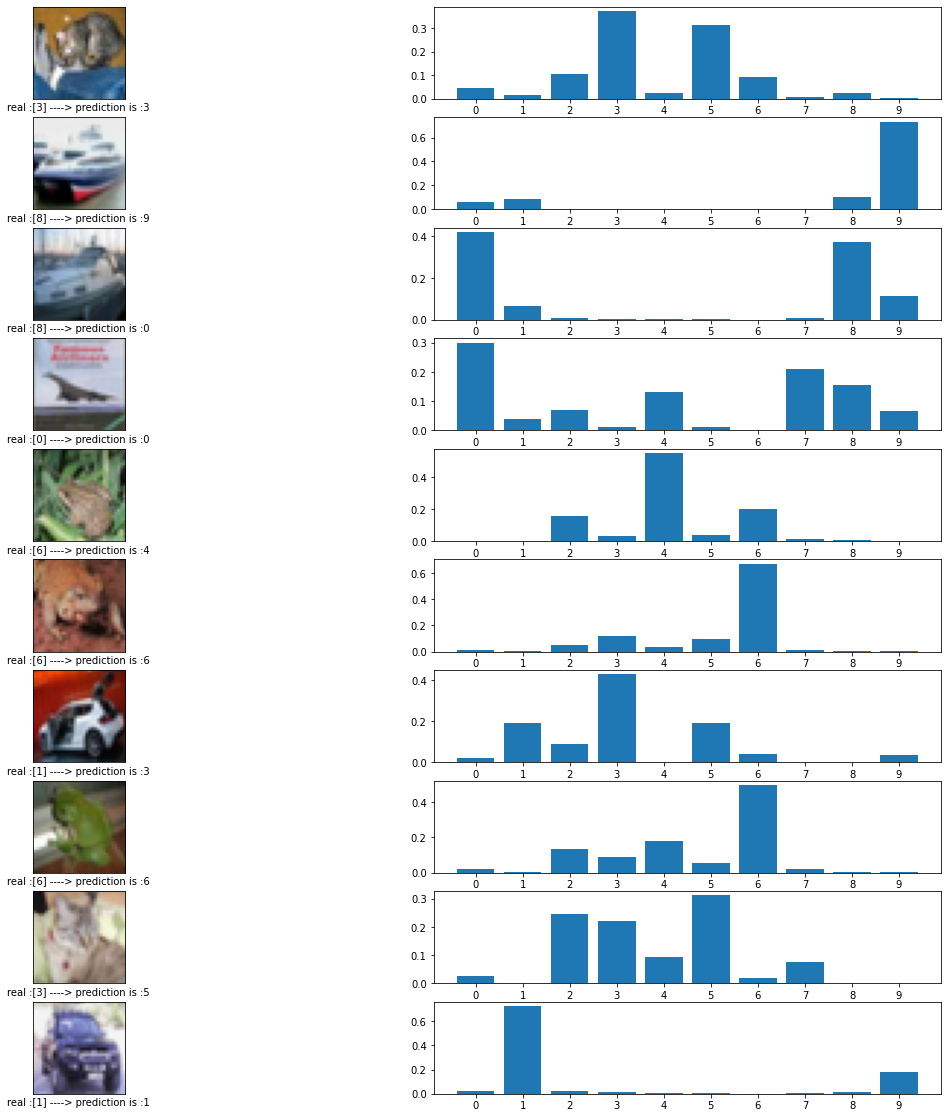

In [46]:
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(10,2,2*i+1)
  plt.imshow(x_test[i])
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f"real :{y_test[i]} ----> prediction is :{np.argmax(prediction[i])}")
  plt.subplot(10,2,2*i+2)
  plt.xticks(range(10))
  plt.bar(range(10),prediction[i])

plt.show()

In [47]:
model.save("multi_NN.h5")